In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from statistics import mode

In [2]:
X = [[0], [1], [2], [3], [4]]
y = [0, 0.3, 0.75, 1, 2]

In [3]:
def distance (a,b):
    assert len(a) == len(b) , 'Not compatible'
    sq_dist = np.sum([(a[i]-b[i])**2 for i in range(len(a))])
    return np.sqrt(sq_dist)

In [4]:
def kNN_regression(X_train, y_train, X_test, k):
    
    #X_train = np.reshape(X_train, (len(X_train),))
    #X_test = np.reshape(X_test, (len(X_test),))
    y_train = np.array(y_train)
    y_preds = []
    for x in X_test:
        distances = []
        for rem in X_train:
            distances.append(distance(x, rem))
        distances = np.argsort(distances)
        distances = distances[:k]
        if (type(y_train[0])is np.ndarray):
            y_pred = []
            for j in range(len(y_train[0])):
                y_t = y_train[:,j]
                y_p = [y_t[p] for p in distances]
                y_pred.append(np.average(y_p))
        else:
            y_pred = np.average([y_train[i] for i in distances])
        y_preds.append(y_pred)
    return y_preds

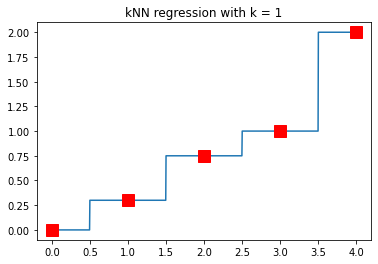

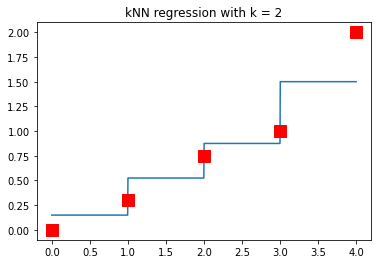

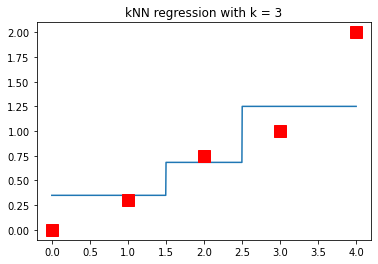

In [5]:
X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)

for k in range(1,4):
    y_preds = kNN_regression(X, y,X_eval,k)
    plt.figure()
    plt.plot(X_eval,y_preds, label="kNN regression predictor")
    plt.plot(X,y, 'rs', markersize=12, label="trainin set")
    plt.title(f"kNN regression with k = {k}")
    plt.show()

In [6]:

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data = df.to_numpy()


In [7]:
X_train , y_train = data[:,0:8], data[:,8:]
X_test = data[:3,0:8]

In [8]:
for k in [1, 3, 10]:
    y_preds = kNN_regression(X_train, y_train,X_test,k)
    print(y_preds)

[[15.55, 21.33], [15.55, 21.33], [15.55, 21.33]]
[[18.56, 23.043333333333333], [15.550000000000002, 21.33], [15.550000000000002, 21.33]]
[[24.097, 26.907], [23.741999999999997, 26.546999999999997], [23.792, 26.448]]


In [9]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));


In [10]:
def kNN_classification(X_data, X_test, k):
    y_train = X_data[:,-1]
    X_train = np.delete(X_data, -1, axis = 1)
    
    y_preds = []
    
    for x in X_test:
        distances = []
        for rem in X_train:
            distances.append(distance(x, rem))
        distances = np.argsort(distances)
        distances = distances[:k]
        label = mode([X_data[i][-1] for i in distances])
        y_preds.append(label)
    return np.array(y_preds)

In [11]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


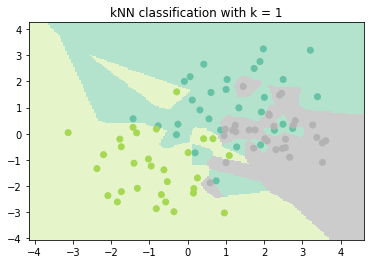

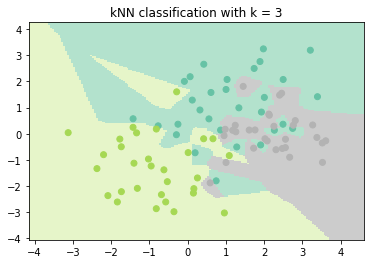

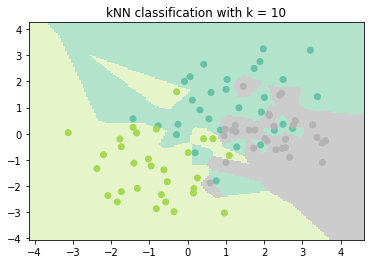

In [12]:
for k in [1,3,10]:
    Z = kNN_classification(X, np.c_[xx.ravel(), yy.ravel()], 1)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

    plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
    plt.title(f"kNN classification with k = {k}")
    plt.show()



In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
data = df.to_numpy()

In [14]:
index = np.random.randint(0,4600, size = (10,))
random_mails = [data[i] for i in index]
true_label = [int(x[-1]) for x in random_mails]

X_test = np.delete(random_mails, -1, axis = 1)

print('1.0 --> Spam , 0 --> Not Spam\n')
print("True labels : \t\t", true_label)
for k in [1,3,10]:
    pred_labels = kNN_classification(data, X_test, k)
    print(f"k = {k}: Predicted labels:", pred_labels)


1.0 --> Spam , 0 --> Not Spam

True labels : 		 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
k = 1: Predicted labels: [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
k = 3: Predicted labels: [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
k = 10: Predicted labels: [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
